In [0]:
# In this project we'll classify photos as either containing a dog or cat.

In [0]:
# For this we have downloaded the dataset from Kaggle. Link to the same is: 
# https://www.kaggle.com/c/dogs-vs-cats/data

In [0]:
# We are using google colab to do this project as colab as GPU availability. Dataset needs to be uploaded to google
# drive before we can access it in colab. The dataset should be in a .zip file. We'll load the dataset as shown by
# the below code.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

# This code gives colab access to your google drive. Click on the link and enter theauthorization code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/train.zip"

# We need to unzip the dataset. Here our dataset is train.zip and /content/drive/My Drive/ tells where the dataset
# is located in the drive. 

In [0]:
# Libraries
from matplotlib import pyplot
from matplotlib.image import imread
from numpy import load

import sys
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [0]:
# Loading dataset and plotting dogs and cats photo
train = "train/"

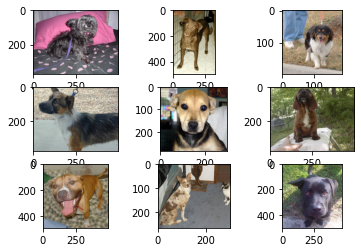

In [24]:
# Plotting first 9 dog photos from dataset, we can also plot random images

for i in range(9):
    pyplot.subplot(330 + i + 1)   # Define subplot
    filename = train + 'dog.' + str(i) + '.jpg'   # Define filename
    image = imread(filename)   # Load image pixels
    pyplot.imshow(image)   # Plot raw pixel data
pyplot.show()   # Show figure

# subplot is used to plot two or more plots in a single figure and 330 + i + 1 describes position of figure in 
# subplot

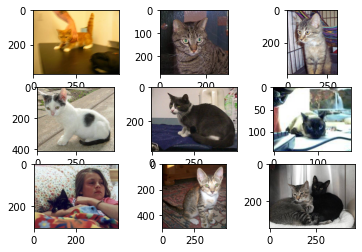

In [0]:
# Plotting first 9 cat photos from dataset, we can also plot random images

for i in range(9):
    pyplot.subplot(330 + i + 1)   
    filename = train + 'cat.' + str(i) + '.jpg'   
    image = imread(filename)   
    pyplot.imshow(image)   
pyplot.show()

In [0]:
# In the bottom left corner image the cat is hardly visible, our classifier must be robust to take into account such
# problems

In [0]:
# From the above photos we find that they are of different shapes and sizes. Before we train our model, photos need
# to be reshaped. For this we choose a fixed image size of 200x200 pixels. Also smaller input means the model would
# be trained faster. This is our data preprocessing.

In [0]:
# To preprocess data we'll use Keras Image Data Generator class API. This divides images into train/ and test/ 
# directory and further subdirectory for each class say train/dog/ and train/cat/. Images are then organised in 
# sub-directories.

# This is how directories would be created
# dataset_dogs_vs_cats
#     test
#         cats
#         dogs
#     train
#         cats
#         dogs

# We'll create such a directory using the makedirs() function.

In [0]:
# Creating directories
dataset = 'dataset_dogs_vs_cats'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']  # Labelling directories
    for labldirs in labeldirs:
        newdir = dataset + subdir + labldirs
        makedirs(newdir)

# Once directories have been made we'll copy images into their respective directories. We can decide to randomly 
# hold 25% images into test dataset. This is done consistently by fixing the seed for the pseudorandom number 
# generator so that we get the same split of data each time the code is run. 

seed(1)   # Seed random number generator
val_ratio = 0.25   # define ratio of pictures to use for validation

# copy training images into subdirectories
src_directory = 'train/'   
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset + dst_dir + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset + dst_dir + 'dogs/' + file
        copyfile(src, dst)

In [0]:
# Now our data has been preprocessed and we'll build a basic CNN model for classification. We'll build the VGG model
# becuase its easy to understand and achieved top performance in ILSVRC competition. 

# The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. 
# Together, these layers form a block, and these blocks can be repeated where the number of filters in each block 
# is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. 
# Padding is used on the convolutional layers to ensure the height and width shapes of the output feature maps 
# matches the inputs.

# We'll explore this architecture on the dogs vs cats problem and compare a model with this architecture with 1, 2 
# and 3 blocks. We can also have more number of blocks but having more number of blocks would either cause over-
# fitting and after some stage accuracy would increase only marginally despite having more number of blocks.

# For the activation function we'll use the ReLU activation function.

# Good Links are given below:
# https://cs231n.github.io/convolutional-networks/
# https://neurohive.io/en/popular-networks/vgg16/

In [0]:
# Now we have to train our model. Since our dataset is large and it contains about 25k images we have to use a GPU 
# so that the model trains fast. The model might take a large time to be trained on a CPU. To ensure we are using 
# the GPU we write the following code:

tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Since GPU is enabled we get output as '/device:GPU:0'. If GPU isn't available then output will be ''.

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Instructions for updating:
Please use Model.evaluate, which supports generators.
> 73.441


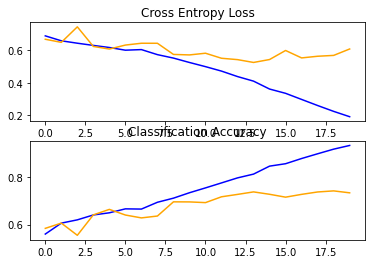

In [0]:
# We'll develop a baseline CNN model. A convolutional layer followed by a pooling layer forms a block. We'll create
# 1 block VGG model and then increase the number of blocks.

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Plotting diagnostic learning curves
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()
      
# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    datagen = ImageDataGenerator(rescale = 1.0/255.0)

    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 20, verbose = 0)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' %(acc * 100.0))

    # plotting learning curves
    summarize_diagnostics(history)

# run run_test_harness
run_test_harness() 

In [0]:
# Epoch is a measure of the number of times all of the training vectors are used once to update the weights.

# Verbose can take 3 values 0, 1, 2. Verbose = 0 doesn't show anything. Verbose = 1 shows a progress bar for the 
# training and Verbose = 3 will mention the epochs say epoch 1/10. Refer the following stackoverflow link for better
# explanation:
# https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model 

# To train, we have used a 1 block VGG model which has a single convolutional layer with 32 filters followed by a 
# max pooling layer. Also, Running this example first prints the size of the train and test datasets, confirming that
# the dataset was loaded correctly.

# In this case, we can see that the model achieved an accuracy of about 73.4% on the test dataset. The exact accuracy 
# that is obtained may differ given the stochastic nature of the learning algorithm.

# A figure is created that shows a line plot for the loss and another for the accuracy of the model on both the 
# train (blue) and test (orange) datasets. Seeing this plot, we can see that the model has overfit the training 
# dataset at about 12 epochs.

In [0]:
# The one block VGG model has few issues. First, we aren't getting a good testing accuracy and secondly the model is 
# overfitting. We therefore build a 2 block VGG model as shown. To build the 2 block VGG model we need to do some 
# changes in the define_model function. Rest of the code remains same.

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
> 76.630


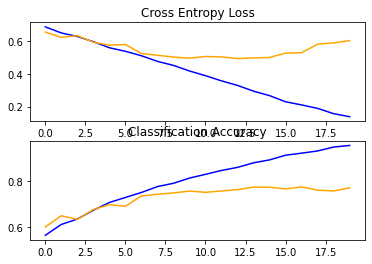

In [0]:
# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Plotting diagnostic learning curves
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()
      
# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    datagen = ImageDataGenerator(rescale = 1.0/255.0)

    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 20, verbose = 0)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' %(acc * 100.0))

    # plotting learning curves
    summarize_diagnostics(history)

# run run_test_harness
run_test_harness()

In [0]:
# The 2 block VGG model adds a second block with 64 filters on top of the 1 block VGG model. 

# When we run this code it prints the size of the train and test datasets, confirming that the dataset was loaded 
# correctly. After running the accuracy on test dataset is 76.63% which is better than the accuracy obtained in one
# block VGG model. The accuracy may differ due to the stochastic nature of learning algorithm. 

# The model achieved a small improvement in performance from about 72% with one block to about 76% accuracy with two
# blocks. Seeing the plot of the learning curves, we can see that again the model appears to have overfit the 
# training dataset, earlier than the one block model, at around eight training epochs.

# The overfitting is likely the result of the increased capacity of the model that is increasing the number of blocks, 
# and we might expect this trend of sooner overfitting to continue with the next model that is model with 3 blocks.

In [0]:
# Now we'll build a 3 block VGG model. It adds a 3rd block of 128 filters over the 2 block VGG model. Here also, 
# we'll do some changes in the define_model() function. The entire code remains same.

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
> 79.137


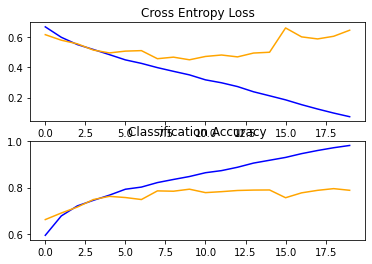

In [0]:
# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Plotting diagnostic learning curves
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()
      
# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    datagen = ImageDataGenerator(rescale = 1.0/255.0)

    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 20, verbose = 0)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' %(acc * 100.0))

    # plotting learning curves
    summarize_diagnostics(history)

# run run_test_harness
run_test_harness()

In [0]:
# When we run this example, it prints the size of the train and test datasets, confirming that the dataset was loaded 
# correctly. Once the code runs we get the accracy of model on the test dataset. The accuracy may vary due to the 
# stochastic nature of the algorithm.

# In this case, we achieve an increase in the accuracy on test dataset from about 76% for a two block VGG model to 
# about 79% accuracy for a three block VGG model. This result is decent enough, because it is close to the earlier 
# state-of-the-art accuracy reported in the paper which was developed using an SVM and has about 82% accuracy.

# When we see the plot of the learning curves, we can see a similar trend of overfitting as in earlier blocks. In 
# this case we can see that the model appears to overfit the training dataset earlier than the 2 block model which
# is around epoch 5 to 6.

In [0]:
# We saw 3 different VGG models with 1, 2 and 3 blocks with approx 72%, 76%, 79% of testing accuracy respectively. 
# Although the accuracy was improving but the model was also overfitting. This suggests that model will benefit from 
# regularization techniques like dropout, weight decay and data augmentation. We'll now improve the model.

# We'll use the 3 block VGG model and add improvements to it. We'll see how the training accuracy improves when we 
# do both dropot regularization and data augmentation. Both these approaches are expected to slow the rate of 
# improvement during training and thus counter the overfitting on the training dataset. We can also increase the 
# number of epochs from 20 to 50. Doing this, gives the model more space for refinement. 

In [0]:
# Dropout Regularization

# Dropout regularization is a computationally cheap way to regularize a deep neural network. It works by 
# probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample
# or activations from a previous layer. It has the effect of simulating a large number of networks with very 
# different network structures and, in turn, making nodes in the network generally more robust to the inputs.

# Typically, a small amount of dropout can be applied after each VGG block, with more dropout applied to the fully 
# connected layers near the output layer of the model.

# For dropout regularization we have the same code as written for VGG3 block. There would only be some changes in
# define_model() function.

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
> 79.549


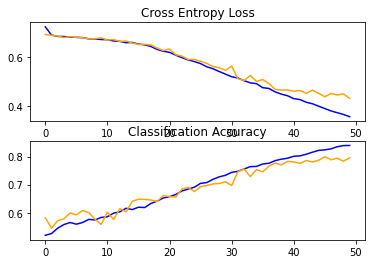

In [0]:
# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Plotting diagnostic learning curves
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()
      
# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    datagen = ImageDataGenerator(rescale = 1.0/255.0)

    # prepare iterators
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 50, verbose = 0)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' %(acc * 100.0))

    # plotting learning curves
    summarize_diagnostics(history)

# run run_test_harness
run_test_harness()


In [0]:
# Running the above code first fits the model, then reports the accuracy on the test dataset. The accuracy may vary
# due to the stochastic nature of the learning algorithm.

# In this case, we can see a small lift in the model accuracy from about 79.1% accuracy for the baseline VGG 3 
# blockmodel to about 79.6% with the addition of dropout regularization which is very little

# If we see the learning curves, we observe that the dropout has had an effect on the rate of improvement of the 
# model on both the training and test datasets. Overfitting has been reduced. The result also suggests that further
# training epochs may result in further improvement of the model. We can also explore the model with a slightly 
# higher dropout rate after the VGG blocks in addition to the increase in number of training epochs [Epochs increased
# to 50].

In [0]:
# Now we'll see Image data augmentation. It is is a technique that can be used to artificially expand the size of a
# training dataset by creating modified versions of images in the dataset.

# Training deep learning neural network models on more data can result in more skillful models, and the augmentation
# techniques can create variations of the images that can improve the ability of the fit models to generalize what 
# they have learned to new images.

# Data augmentation can also act as a regularization technique, adding noise to the training data, and encouraging 
# the model to learn the same features, invariant to their position in the input.

# Small changes to the input photos of dogs and cats might be useful for this problem, such as small shifts and 
# horizontal flips. These augmentations can be specified as arguments to the ImageDataGenerator used for the training 
# dataset. The augmentations should not be used for the test dataset, as we wish to evaluate the performance of the
# model on the unmodified photographs.

# This requires that we have a separate ImageDataGenerator instance for the train and test dataset, then iterators 
# for the train and test sets created from the respective data generators. 

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/50
293/293 [==============================] - 217s 742ms/step - loss: 0.6731 - accuracy: 0.5899 - val_loss: 0.6630 - val_accuracy: 0.5977
Epoch 2/50
293/293 [==============================] - 215s 733ms/step - loss: 0.6361 - accuracy: 0.6314 - val_loss: 0.6049 - val_accuracy: 0.6602
Epoch 3/50
293/293 [==============================] - 215s 732ms/step - loss: 0.6049 - accuracy: 0.6675 - val_loss: 0.5750 - val_accuracy: 0.6916
Epoch 4/50
293/293 [==============================] - 217s 741ms/step - loss: 0.5850 - accuracy: 0.6897 - val_loss: 0.5448 - val_accuracy: 0.7216
Epoch 5/50
293/293 [==============================] - 216s 736ms/step - loss: 0.5610 - accuracy: 0.7098 - val_loss: 0.5324 - val_accuracy: 0.7314
Epoch 6/50
293/293 [==============================] - 215s 735ms/step - loss: 0.5460 - accuracy: 0.7224 - val_loss: 0.5509 - val_accuracy: 0.7109
Epoch 7/50
293/293 [===================

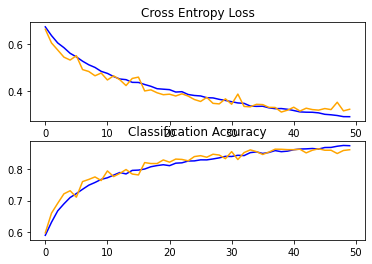

In [48]:
# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Plotting diagnostic learning curves
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()

# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    train_datagen = ImageDataGenerator(rescale = 1.0/255.0, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))
    test_it = test_datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 50, verbose = 1)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' %(acc * 100.0))

    # plotting learning curves
    summarize_diagnostics(history)

# run run_test_harness
run_test_harness()

In [0]:
# Running the example first fits the model, then reports the model performance on the our test dataset. The specific
# results may vary given the stochastic nature of the learning algorithm.

# In this case, we can see a lift in performance of about 5% from about 79.5% for the VGG-3 model with droupot 
# regularization to about 87% for the VGG- model with simple data augmentation.

# Reviewing the learning curves, we can see that it appears the model is capable of further learning with both the 
# loss on the train and test dataset still decreasing even at the end of the run. Repeating the experiment with 100
# or more epochs will very likely result in a better performing model.

# We can also explore other augmentations that may further encourage the learning of features invariant to their 
# position in the input, such as minor rotations and zooms.

In [25]:
# After building the model, we'll now save the model. Following is the code for saving the model

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)   # lr stands for learning rate
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model
 
def run_test_harness():
    # define model
    model = define_model()

    # creating data generator
    train_datagen = ImageDataGenerator(rescale = 1.0/255.0, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

    # prepare iterators
    train_it = train_datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (200, 200))

    # fit model
    model.fit_generator(train_it, steps_per_epoch = len(train_it), epochs = 50, verbose = 1)

    # save model
    model.save('model1.h5')

# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Epoch 1/50
293/293 [==============================] - 193s 659ms/step - loss: 0.6812 - accuracy: 0.5707
Epoch 2/50
293/293 [==============================] - 190s 649ms/step - loss: 0.6419 - accuracy: 0.6288
Epoch 3/50
293/293 [==============================] - 190s 648ms/step - loss: 0.6126 - accuracy: 0.6613
Epoch 4/50
293/293 [==============================] - 190s 649ms/step - loss: 0.5898 - accuracy: 0.6875
Epoch 5/50
293/293 [==============================] - 191s 653ms/step - loss: 0.5684 - accuracy: 0.7029
Epoch 6/50
293/293 [==============================] - 191s 654ms/step - loss: 0.5516 - accuracy: 0.7192
Epoch 7/50
293/293 [==============================] - 192s 656ms/step - loss: 0.5377 - accuracy: 0.7306
Epoch 8/50
293/293 [==============================] - 194s 661ms/step - loss: 0.5240 - accuracy: 0.7405
Epoch 9/50
293/293 [==============================] - 197s 671ms/step - loss: 0.5154 - accuracy: 0.7452
Epoch 10/50
293/293 [

In [0]:
# We have seen some different improvements to the baseline VGG model. For VGG3 model with dropout regularization we
# got accuracy of 79.5% and for the VGG3 model with data augmentation we get accuracy of 86%. Some variance in
# accuracy might be seen due to the stochastic nature of the algorithm. 

# The addition of regularization techniques slows the progression of the learning algorithms and reduces overfitting, 
# resulting in improved performance on the holdout dataset. It is likely that the combination of both approaches 
# with further increase in the number of training epochs will result in further performance improvement.

# Several types of improvements can be explored on this dataset. In addition to tweaks to the regularization methods
# described, other regularization methods could be explored such as weight decay and early stopping.

# We can also make changes to the learning algorithm such as changes to the learning rate, use of a learning rate 
# schedule, or an adaptive learning rate such as Adam.

# We can also explore alternate model architecture. 

In [0]:
# After seeing data augmentation we'll see transfer learning. Transfer learning involves using all or parts of a model 
# trained on a related task. Keras provides a range of pre-trained models that can be loaded and used wholly or 
# partially via the Keras Applications API.

# A useful model to use in this case for transfer learning is one of the VGG models, such as VGG-16 with 16 layers 
# which achieved top results on the ImageNet photo classification challenge.

# The model is comprised of two main parts, the feature extractor part of the model that is made up of VGG blocks, 
# and the classifier part of the model that is made up of fully connected layers and the output layer.

# We can use the feature extraction part of the model and add a new classifier part of the model that is tailored to 
# the dogs and cats dataset. Specifically, we can hold the weights of all of the convolutional layers fixed during
# training, and only train new fully connected layers that will learn to interpret the features extracted from the 
# model and make a binary classification.

# This can be achieved by loading the VGG-16 model, removing the fully connected layers from the output-end of the
# model, then adding the new fully connected layers to interpret the model output and make a prediction. The 
# classifier part of the model can be removed automatically by setting the “include_top” argument to “False“, which
# also requires that the shape of the input also be specified for the model, in this case (224, 224, 3). This means 
# that the loaded model ends at the last max pooling layer, after which we can manually add a Flatten layer and the
# new clasifier layers.

In [0]:
# Once created, we can train the model as before on the training dataset. Not a lot of training will be required in
# this case, as only the new fully connected and output layer have trainable weights. As such, we will fix the 
# number of training epochs at 10.

# The VGG16 model was trained on a specific ImageNet challenge dataset. As such, it is configured to expected input
# images to have the shape 224×224 pixels. We will use this as the target size when loading photos from the dogs and
# cats dataset.

# The model also expects images to be centered. That is, to have the mean pixel values from each channel (red, green, 
# and blue) as calculated on the ImageNet training dataset subtracted from the input. Keras provides a function to 
# perform this preparation for individual photos via the preprocess_input() function. Nevertheless, we can achieve 
# the same effect with the ImageDataGenerator by setting the “featurewise_center” argument to “True” and manually 
# specifying the mean pixel values to use when centering as the mean values from the ImageNet training dataset: 
# [123.68, 116.779, 103.939].

# The full code listing of the VGG model for transfer learning on the dogs vs. cats dataset is listed below.

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
293/293 [==============================] - 151s 517ms/step - loss: 0.2858 - accuracy: 0.9630 - val_loss: 0.0599 - val_accuracy: 0.9772
Epoch 2/10
293/293 [==============================] - 149s 510ms/step - loss: 0.0321 - accuracy: 0.9882 - val_loss: 0.0621 - val_accuracy: 0.9768
Epoch 3/10
293/293 [==============================] - 149s 509ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0663 - val_accuracy: 0.9776
Epoch 4/10
293/293 [==============================] - 149s 508ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0784 - val_accuracy: 0.9787
Epoch 5/10
293/293 [==============================] - 149s 508ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0823 - val_accuracy: 0.9787
Epoch 6/10
293/293 [==============================] - 149s 508ms/step - loss: 0.0011 - accuracy: 0.9997 - val

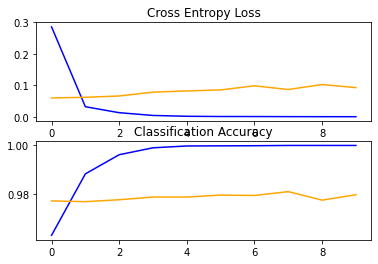

In [15]:
# Define CNN model
def define_model():
    # load model
    model = VGG16(include_top = False, input_shape = (224, 224, 3))
  
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
  
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
    output = Dense(1, activation = 'sigmoid')(class1)

    # define new model
    model = Model(inputs = model.inputs, outputs = output)
  
    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model
 
def summarize_diagnostics(history):
    # plotting loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'orange', label = 'test')

    # plotting accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

    pyplot.show()


# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
  
    # create data generator
    datagen = ImageDataGenerator(featurewise_center = True)
  
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
  
    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (224, 224))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_catstest/', class_mode = 'binary', batch_size = 64, target_size = (224, 224))
  
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch = len(train_it), validation_data = test_it, validation_steps = len(test_it), epochs = 10, verbose = 1)
  
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps = len(test_it), verbose = 0)
    print('> %.3f' % (acc * 100.0))
  
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness 
run_test_harness()

In [0]:
# Running the example first fits the model, then reports the accuracy on the hold out test dataset. The specific 
# accuracy may vary given the stochastic nature of the learning algorithm.

# In this case, we can see that the model achieved very impressive results with a classification accuracy of about
# 97% on the test dataset.

In [0]:
# Seeing the learning curves, we can observe that the model fits the dataset quickly. It does not show strong 
# overfitting, although the results suggest that perhaps additional capacity in the classifier and/or the use of 
# regularization might be helpful.

# There are many improvements that could be made to this approach, including adding dropout regularization to the 
# classifier part of the model and perhaps even fine-tuning the weights of some or all of the layers in the feature
# detector part of the model.

In [19]:
# After building the final model, we'll now save the model. Following is the code for saving the model

# Define CNN model
def define_model():
    # load model
    model = VGG16(include_top = False, input_shape = (224, 224, 3))

    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False

    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
    output = Dense(1, activation = 'sigmoid')(class1)

    # define new model
    model = Model(inputs = model.inputs, outputs = output)

    # compile model
    opt = SGD(lr = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# Running the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()

    # create data generator
    datagen = ImageDataGenerator(featurewise_center = True)

    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]

    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_dogs_vs_catstrain/', class_mode = 'binary', batch_size = 64, target_size = (224, 224))

    # fit model
    model.fit_generator(train_it, steps_per_epoch = len(train_it), epochs = 10, verbose = 1)

    # save model
    model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Found 18697 images belonging to 2 classes.
Epoch 1/10
293/293 [==============================] - 110s 376ms/step - loss: 0.2378 - accuracy: 0.9626
Epoch 2/10
293/293 [==============================] - 112s 382ms/step - loss: 0.0301 - accuracy: 0.9896
Epoch 3/10
293/293 [==============================] - 111s 380ms/step - loss: 0.0098 - accuracy: 0.9973
Epoch 4/10
293/293 [==============================] - 111s 380ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/10
293/293 [==============================] - 111s 380ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 6/10
293/293 [==============================] - 111s 379ms/step - loss: 8.6657e-04 - accuracy: 0.9999
Epoch 7/10
293/293 [==============================] - 111s 378ms/step - loss: 5.8637e-04 - accuracy: 0.9999
Epoch 8/10
293/293 [==============================] - 111s 379ms/step - loss: 5.1538e-04 - accuracy: 0.9999
Epoch 9/10
293/293 [==============================] - 111s 379ms/step - loss: 4.5938e-04 - accuracy: 0.9999
Epoch

In [0]:
# Predictions would be made in another file. In this file we have only trained and saved the models.

In [0]:
# Used to see the directory in which we are currently working
pwd 

'/content'

In [0]:
# Command for deleting a locally created folder in colab
rm -rf 'dataset_dogs_vs_catstest/' 